# Installing InstaLoader & Authentication

In [1]:
!pip install instaloader

In [2]:
import instaloader
import pandas as pd 
import os, json 
import pprint
import time
import datetime 

In [3]:
# Create an instance of Instaloader class
loader = instaloader.Instaloader()

# Enter your Instagram handle and password
ACCOUNT = 'ilovesmt203'
PASSWORD = 'ilovesmt203!haha'

# Upon successful authentication, you should see a message saying Authentication OK.
# Otherwise, check your login details
try:
    loader.login(ACCOUNT, PASSWORD)
    print("Authentication OK")
except:
    print("Error during authentication")
    
# customise the parameter settings based on your download preference
# configuration 
loader = instaloader.Instaloader(download_pictures=False,
                            download_video_thumbnails=False,
                            download_videos=False,
                            download_comments=True,
                            download_geotags=True,
                            compress_json=False,
                            post_metadata_txt_pattern="")

Authentication OK


# Downloading Posts as JSON files

In [163]:
HASHTAG = "trumpimpeachment2"

# Create a Hashtag instance from a given hashtag name
hashtag = instaloader.Hashtag.from_name(loader.context, HASHTAG)
loaded_posts = hashtag.get_all_posts()

for cnt_post, post in enumerate(loaded_posts):
    # date_created = datetime.datetime.fromtimestamp(post.date_utc)
    if datetime.datetime(2021,2,12) <= post.date_local <= datetime.datetime(2021,2,13):
        try:
            loader.download_post(post, target='#'+hashtag.name)
        except:
            print("\nError in downloading. Process halted.")



HTTP redirect from https://www.instagram.com/graphql/query to https://www.instagram.com/accounts/login/

Error in downloading. Process halted.


In [4]:
mypath = "."
folder_name = '#trumpimpeachment'

json_path = f'{mypath}/{folder_name}'
json_path

'./#trumpimpeachment'

# Extracting Individual Post Information

In [23]:
def convert_json_posts_to_df(json_path):
    substring = "comment"
    json_files = [filename for filename in os.listdir(json_path) if (filename.endswith('.json') and substring not in filename)]
    post_list = []

    # iterate through the list of JSON files
    for js in json_files:
            
        # open and read each json file
        with open(os.path.join(json_path, js)) as json_file:
            json_text = json.load(json_file)
            #pprint.pprint(json.text)
            
            try:
                # extract Instagram post information
                comment_id = json_text['node']['id']
                user_id = json_text['node']['owner']['id']
                unix_timestamp = json_text['node']['taken_at_timestamp']
                date_time = datetime.datetime.fromtimestamp(unix_timestamp)
                likes_count = json_text['node']['edge_liked_by']['count']
                
                try:
                    comment = json_text['node']['accessibility_caption']
                except:
                    pass
            except:
                pass
        
        post_list.append([comment_id, user_id, date_time, likes_count, comment])
    df = pd.DataFrame(data=post_list, columns=['comment_id', 'user_id', 'date_time', 'likes_count', 'comment'])
    return df

In [24]:
import json
import datetime
import pandas as pd

# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_rows', None)

df1 = convert_json_posts_to_df(json_path)
df1.insert(2, 'platform', 'instagram')
df1.head()

,comment_id,user_id,platform,date_time,likes_count,comment
0,2481702515306198095,4028120102,instagram,2021-01-08 07:26:55,2429,These recent events are just a reminder of how senseless racism is in our nation. One can only extrapolate the outcomes for people of a different kindred. \n\nHow is what you’re witnessing moving your heart? What are you going to do about it?\n\n#HatedInAHoodie X @RacismIsLame
1,2486179521268533288,188300198,instagram,2021-01-14 11:41:56,2727,"Photo by Sue Yun on January 13, 2021. May be an illustration of one or more people, suit and text that says '#1 PRESIDENT* *IN NUMBER OF IMPEACHMENTS'."
2,2493835123373749797,7302369111,instagram,2021-01-25 01:12:15,5,"Photo by Joseph Saiz in Casa Grande, Arizona. May be an image of food and text that says 'DEMOCRATS MOCRATS OF CASA GRANDE'."
3,2494814649829286426,6548269,instagram,2021-01-26 09:38:23,113,"Photo by ✨B R E N | House of Bren✨ in White House, Washington DC with @senatorleahy. May be an image of 3 people, people standing and food."
4,2495366025206702189,1248674957,instagram,2021-01-27 03:53:52,264,"Photo shared by Phillip butah on January 26, 2021 tagging @ivankatrump, @fleccas, @lilpump, @thecjpearson, @erictrump, @realdonaldtrump, @unilad, @channel4news, @jesseleepeterson, @gmb, @piersmorgan, @_katie_hopkins_, @trump, @realmagahulk, @tuckercarlsontonight, @realcandaceowens, @joelpatrick1776, @libertyhangout, @trumkin, and @melaniatrump. May be an illustration of one or more people and food."


# Extracting Comments from each Post

In [25]:
 def convert_comments_posts_to_df(json_path):
    substring = "comment"
    json_files = [filename for filename in os.listdir(json_path) if (filename.endswith('.json') and substring in filename)]
    post_list = []

    # iterate through the list of JSON files
    for js in json_files:
            
        # open and read each json file
        with open(os.path.join(json_path, js)) as json_file:
            json_text = json.load(json_file)
            #pprint.pprint(json.text)
            
            #extract comments from comments.json files
            for comment in json_text:
                comment_id = comment['id']
                user_id = comment['owner']['id']
                date_time = datetime.datetime.fromtimestamp(comment['created_at'])
                likes_count = comment['likes_count']
                comment= comment['text']
                
                post_list.append([comment_id, user_id, date_time, likes_count, comment])

    df = pd.DataFrame(data=post_list, columns=['comment_id', 'user_id', 'date_time', 'likes_count', 'comment'])
    return df

In [27]:
import json
import datetime
import pandas as pd

# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_rows', None)

df2 = convert_comments_posts_to_df(json_path)
df2.insert(2, 'platform', 'instagram')
df2.head()

# df2.to_csv('')

,comment_id,user_id,platform,date_time,likes_count,comment
0,17966998288364376,33597388,instagram,2021-02-13 22:54:15,0,Yeah all the black people attacking and murdering Hasidic Jews needs to stop. Blacks can be racists too. In fact growing up Jewish in Brooklyn the only racism I experienced was by black people.
1,17885746028017595,2299592476,instagram,2021-02-13 09:13:03,0,Are you referring to what is happening on the NYC subway?
2,17842696493521935,1651100777,instagram,2021-01-22 12:51:37,0,🙌
3,18138103390087013,4147796433,instagram,2021-01-21 06:42:10,1,@debbyanmcfarlane
4,17914123522572768,41693285374,instagram,2021-01-19 20:39:03,0,"I have a proposal for you, talk me to privately 📥📥📥"


# Text Pre-processing

In [136]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
import re

from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
stopwords_list += ['trump', 'impeachment', 'photo', 'february'] #additional stopwords customised based on context 

In [137]:
output1 = []
output2 = []
for text in df2['comment']: #change the df name accordingly to the df that requires text pre-processing
    text = re.sub(r"(?:\@|\#|https?\://)\S+", "", str(text)) # remove hashtag mentions and urls
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE) 
    text = emoji_pattern.sub(r'', str(text)) # remove emojis
    text_tokenised = word_tokenize(text)
    text_lower = [w.lower() for w in text_tokenised]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_stopremoved = [w for w in text_words_only if w not in stopwords_list]

    # stemmer = PorterStemmer()
    # text_stemmed = [stemmer.stem(w) for w in text_stopremoved]
    # output.append(text_stemmed)
    output1.append(text_stopremoved)
    output2.append(text)

In [138]:
df2['comment_no_emoji'] = output2
df2['comment_processed'] = output1
df2.tail()

,comment_id,user_id,platform,date_time,likes_count,comment,comment_no_emoji,comment_processed
286,18149271544190128,2220963508,instagram,2021-02-12 23:56:30,5,F her,F her,[f]
287,17861430776355599,2996004148,instagram,2021-02-12 23:48:20,0,Most of the trump cultists are like him what a coincidence 😂,Most of the trump cultists are like him what a coincidence,"[cultists, like, coincidence]"
288,17878659701126348,1816182608,instagram,2021-02-12 23:45:49,3,Eyeing the VP run in 24. Pence Haley,Eyeing the VP run in 24. Pence Haley,"[eyeing, vp, run, pence, haley]"
289,17891593381920969,38523506517,instagram,2021-02-12 23:38:59,16,I’m not a trumper but she has no loyalty to anyone or anything - typical,I’m not a trumper but she has no loyalty to anyone or anything - typical,"[trumper, loyalty, anyone, anything, typical]"
290,18139791241087523,27633441938,instagram,2021-02-12 23:37:45,7,It’s about damn time she came to her senses!,It’s about damn time she came to her senses!,"[damn, time, came, senses]"


## Merging the Posts and Comments DataFrames into a single one 

In [161]:
frames = [df1, df2]
combined = pd.concat(frames)
combined.dropna(inplace=True)


df = combined[combined['comment'].str.startswith("Photo by")==False]
df = df[df['comment'].str.startswith("Photo shared by")==False]
df.head()

df.to_csv('instagram_comments.csv')

# Word Clouds

In [156]:
wordcloud_words = []
for wordlist in combined['comment_processed']:
    for word in wordlist:
        wordcloud_words.append(str(word))

print(wordcloud_words)

['yeah', 'black', 'people', 'attacking', 'murdering', 'hasidic', 'jews', 'needs', 'stop', 'blacks', 'racists', 'fact', 'growing', 'jewish', 'brooklyn', 'racism', 'experienced', 'black', 'people', 'referring', 'happening', 'nyc', 'subway', 'proposal', 'talk', 'privately', 'hooodie', 'love', 'hoodie', 'stand', 'speak', 'racism', 'must', 'end', 'must', 'learn', 'love', 'gives', 'anger', 'sadness', 'frustration', 'never', 'give', 'tiny', 'power', 'believe', 'repetition', 'need', 'repeat', 'information', 'brainwash', 'people', 'brains', 'way', 'around', 'schools', 'parents', 'media', 'lot', 'narrative', 'daughter', 'friends', 'even', 'better', 'think', 'something', 'happening', 'new', 'generations', 'need', 'hoodie', 'color', 'facts', 'facts', 'disheartening', 'worrisome', 'worry', 'children', 'especially', 'son', 'lost', 'words', 'never', 'ever', 'lifetime', 'ever', 'imagined', 'would', 'see', 'kinda', 'behavior', 'united', 'states', 'america', 'give', 'kudos', 'movie', 'directors', 'warne

In [157]:
wordcloud_string = ""
for word in wordcloud_words:
    wordcloud_string += word+" "

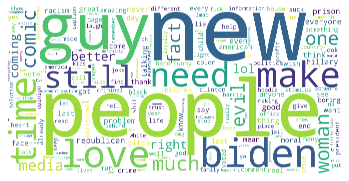

In [159]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", width=10000, height=5000).generate(wordcloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("trump_impeachment2.png")

# Sentiment Analysis
## VADER Analysis (better for short texts)

In [85]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer 
    # oject gives a sentiment dictionary. 
    # which contains pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
      
    print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative") 
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral") 
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if sentiment_dict['compound'] >= 0.05 : 
        print("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral") 